In [ ]:
#créer une fonctions pour créer les postes qui prenent comme argument la puissance "P" poste,
# la longueur "l" du tronçon précédent le poste, et nom du poste
# Créer une variable "Cumul" dans chaque poste, de base égale à "L" (sera éditée plus tard )

#Créer une fonction pour créer un té, prenant comme argument les postes/té en aval du té en question 
# peut être 2 postes, 2 té, le plus souvent un té un poste
# dans cette foction calculer la puissance "P" comme étant = à la puissance des nodes aval*
# également définir cumul = "L" du té
# penser à venir éditer la longueur "L" des deux nodes aval comme étant égale au cumul du té + "L" du poste en question 
#vérifier si solution viable, le cumul devra évoluer au fur et à mesure de l'ajout de tés et postes.
#probablement faire une for loop qui itère sur toutes les nodes crées pour mettre à jour cumul !
#append une liste/dictionnaire des nodes crées et nodes qui y sont liées en amont

#l'arboressence devra être créée du poste le plus loin jusqu'à la production.
#les postes pourront être rentrés sans liens au début, possiblement via tableau excel, les té seront alors ajoutés après.

#créer aussi fonction ajout node "production", avec argument le nom et un node té
#permet juste de boucler le réseau en y reliant le dernier Té


#créer un interface Tkinter avec boutons "ajout poste", "ajout té", "ajout production"
#à chaque ajout faire apparaitre le graphe à jour

[(1, {'Nom': 'CF1', 'Puissance': 1000, 'Longueur': 1, 'Cumul': 4}), (2, {'Nom': 'CF2', 'Puissance': 1000, 'Longueur': 1, 'Cumul': 4}), ('t1', {'Longueur': 1, 'Puissance': 2000, 'Cumul': 3}), (3, {'Nom': 'CF3', 'Puissance': 1000, 'Longueur': 1, 'Cumul': 3}), ('t2', {'Longueur': 1, 'Puissance': 3000, 'Cumul': 2}), (4, {'Nom': 'CF4', 'Puissance': 1000, 'Longueur': 1, 'Cumul': 2}), ('t3', {'Longueur': 1, 'Puissance': 4000, 'Cumul': 1}), ('Prod', {'Longueur': 0, 'Puissance': 4000})]


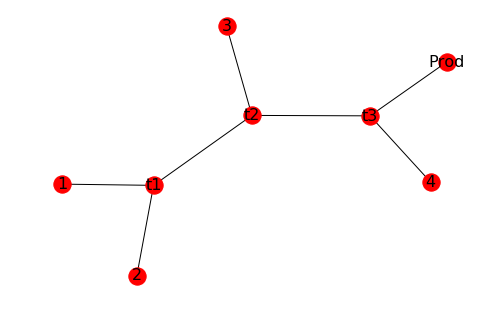

In [24]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
liste_de_postes = []


def ajout_poste(Rep, Nom, P, L):
    
    G.add_node(Rep,Nom = Nom, Puissance = P, Longueur = L)
    G.node[Rep]["Cumul"] = G.node[Rep]["Longueur"]
    liste_de_postes.append(Rep)

#Exemple commande user:
ajout_poste(1,"CF1", 1000, 1)    
ajout_poste(2,"CF2", 1000, 1)

def ajout_té(Rep, aval1, aval2, L):
    
    G.add_node(Rep, Longueur = L)
    G.node[Rep]["Puissance"] = G.node[aval1]["Puissance"] + G.node[aval2]["Puissance"]
    G.add_edge(aval1,Rep)
    G.add_edge(aval2,Rep)
    G[aval1][Rep]["Longueur"] = G.nodes[aval1]["Longueur"]
    G[aval2][Rep]["Longueur"] = G.nodes[aval2]["Longueur"]
    liste_de_postes.append(Rep)
    
    
def ajout_prod(Nom, té):
    G.add_node("Prod",Longueur=0)
    G.add_edge("Prod",té)
    G.node["Prod"]["Puissance"] = G.node[té]["Puissance"]
    
#Exemple commande user:
ajout_té("t1", 1, 2, 1)
ajout_poste(3,"CF3", 1000, 1)
ajout_té("t2", 3, "t1", 1)
ajout_poste(4,"CF4", 1000, 1)
ajout_té("t3", 4, "t2", 1)
ajout_prod("Prod", "t3")



#paths

#print(liste_de_postes)

liste_de_routes=[]
for poste in liste_de_postes:
    for path in nx.all_simple_paths(G, source="Prod", target=poste):
        liste_de_routes.append(path)

#print(liste_de_routes)


#print(G.nodes.data())
#print(G.nodes.data())


#Calcul des cumuls:

for route in liste_de_routes:
    cumul = 0
    for poste in route:
        cumul += G.node[poste]["Longueur"]
    G.node[route[-1]]["Cumul"] = cumul    
        
print(G.nodes.data())


#Dessin

pos = nx.spring_layout(G)
nx.draw(G, pos, font_size=16, with_labels=True)

#coordonées des postes, on vera plus tard commend le gérer
#pos = {
#    1:(4,3),
#    2:(4,1),
#    3:(3,3),
#    4:(2,3),
#    "t1":(4,2),
#    "t2":(3,2),
#    "t3":(2,2),
#    "Prod":(1,2)
#}


#nx.draw_shell(G)
#nx.draw_kamada_kawai(G)
#nx.draw_networkx(G,pos, arrows=True, with_labels=True)



